<a href="https://colab.research.google.com/github/v-zeng/python_projects/blob/main/tf_audio_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Deep Audio Classifier with Tensorflow
### Data from: https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing

In [ ]:
# install dependencies
# !pip install Tensorflow-io matplotlib

In [22]:
# load dependencies
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [23]:
# define path to data files
capuchin_file = os.path.join('/content/drive/MyDrive/python_projects_data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
not_capuchin_file = os.path.join('/content/drive/MyDrive/python_projects_data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [9]:
not_capuchin_file

'data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

In [10]:
# create function to load data and convert to 16Hz mono channel
# code below references tensorflow docs
def load_wav_16k_mono(filename):
  # load encoded wav file
  file_contents = tf.io.read_file(filename)
  # decode wav, mono channel
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  # removes trailing axis, cast sample rate as 64 bit int for resampling
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  # goes from 44100Hz to 16000Hz - amplitude of the audio signal
  # reduces amount of data processing required
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

In [35]:
# load the two waves defined in paths above
wave = load_wav_16k_mono(capuchin_file)
nwave = load_wav_16k_mono(not_capuchin_file)

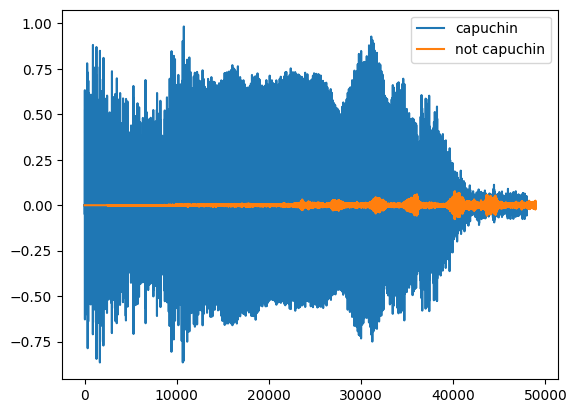

In [40]:
plt.plot(wave)
plt.plot(nwave)
plt.legend(['capuchin', 'not capuchin'])
plt.show()

<tf.Tensor: shape=(48000, 1), dtype=float32, numpy=
array([[ 8.9910554e-07],
       [-2.7947258e-06],
       [ 7.0741157e-06],
       ...,
       [-1.0823049e-02],
       [-3.5766482e-03],
       [ 1.5143131e-02]], dtype=float32)>